<a href="https://colab.research.google.com/github/SenolIsci/finance_volatiliy_modeling_regime_detection/blob/main/crypto_returns_timeseries_modeling_with_HiddenMarkovModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Volatility Modeling of times series data. 
#Regime Detection.Hidden Markov Models.
high volatility and low voltility regions.

In [ ]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from hmmlearn import hmm

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir('gdrive/My Drive/Colab Notebooks/Financial Engineering and AI/')
!ls

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [ ]:
df = df0 = pd.read_csv('hitbtc_BTC_USDT_data_15m_1256.csv', index_col="timestamp", parse_dates=True,infer_datetime_format=True)

In [ ]:
df.head()

,Close,High,Low,Open,Volume,VolumeQuote,TR,ATR_5,SLOPE_5,PATR_5,...,Indc_RSI_10,Indc_MFI_12,Indc_SO%k_14,Indc_DMI,Indc_MACDdiff_12_26,Indc_ADX_10_14,Indc_PATR_5,Indc_ATR_5,Indc_SLOPE_5,LocalMinMax
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-01-13 20:15:00+00:00,3493.20,3495.00,3489.40,3494.71,284.05,9.922435e+05,5.60,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL
2019-01-13 20:30:00+00:00,3494.39,3494.67,3492.22,3492.75,8.74,3.054097e+04,2.45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL
2019-01-13 20:45:00+00:00,3483.60,3494.59,3483.60,3494.29,214.10,7.458388e+05,10.99,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL
2019-01-13 21:00:00+00:00,3482.18,3485.70,3480.00,3483.11,154.76,5.389022e+05,5.70,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUY
2019-01-13 21:15:00+00:00,3500.81,3503.24,3474.96,3482.53,553.72,1.938469e+06,28.28,10.604,0.301,0.302901,...,NaN,NaN,NaN,NaN,NaN,NaN,BUYSELL,NEUTRAL,NEUTRAL,NEUTRAL


In [ ]:
#take half of the  data for visualization ease
start=int(len(df)/2)
df=df.iloc[start:,:]

In [ ]:
returns = np.log(df['Close']).diff()

In [ ]:
returns.dropna(inplace=True)

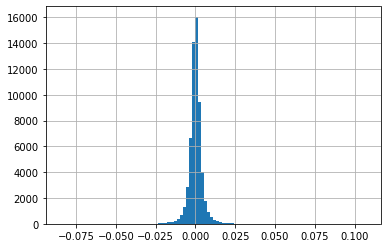

In [ ]:
returns.hist(bins=100);

In [ ]:
X=returns.to_numpy().reshape(-1, 1)
scores = list()
models = list()
for n_components in range(1, 5):
    for idx in range(10):  # ten different random starting states
        # define our hidden Markov model
        model = hmm.GaussianHMM(n_components=n_components, random_state=idx,covariance_type="diag",
                               n_iter=10)
        model.fit(X)
        models.append(model)
        scores.append(model.score(X))
        print(f'Converged: {model.monitor_.converged}\t\t'
              f'N_comp: {n_components}\t\t'
              f'Score: {scores[-1]}')

# get the best model
model = models[np.argmax(scores)]
print(f'The best model had a score of {max(scores)} and '
      f'{model.n_components} components')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = model.predict(X)

Converged: True		N_comp: 1		Score: 240813.62993157492
Converged: True		N_comp: 1		Score: 240813.62993157492
Converged: True		N_comp: 1		Score: 240813.62993157492
Converged: True		N_comp: 1		Score: 240813.62993157492
Converged: True		N_comp: 1		Score: 240813.62993157492
Converged: True		N_comp: 1		Score: 240813.62993157492
Converged: True		N_comp: 1		Score: 240813.62993157492
Converged: True		N_comp: 1		Score: 240813.62993157492
Converged: True		N_comp: 1		Score: 240813.62993157492
Converged: True		N_comp: 1		Score: 240813.62993157492
Converged: True		N_comp: 2		Score: 252917.6188158815
Converged: True		N_comp: 2		Score: 252917.7843765538
Converged: True		N_comp: 2		Score: 252917.91885484703
Converged: True		N_comp: 2		Score: 252917.79819613192
Converged: True		N_comp: 2		Score: 252917.8583569114
Converged: True		N_comp: 2		Score: 252916.48354971403
Converged: True		N_comp: 2		Score: 252917.83284616633
Converged: True		N_comp: 2		Score: 252918.04688492653
Converged: True		N_comp: 2		Sco

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="diag")

In [ ]:
X = returns.to_numpy().reshape(-1, 1)
model.fit(X)

GaussianHMM(n_components=2)

In [ ]:
Z = model.predict(X)

In [ ]:
Z

array([0, 0, 0, ..., 0, 0, 1])

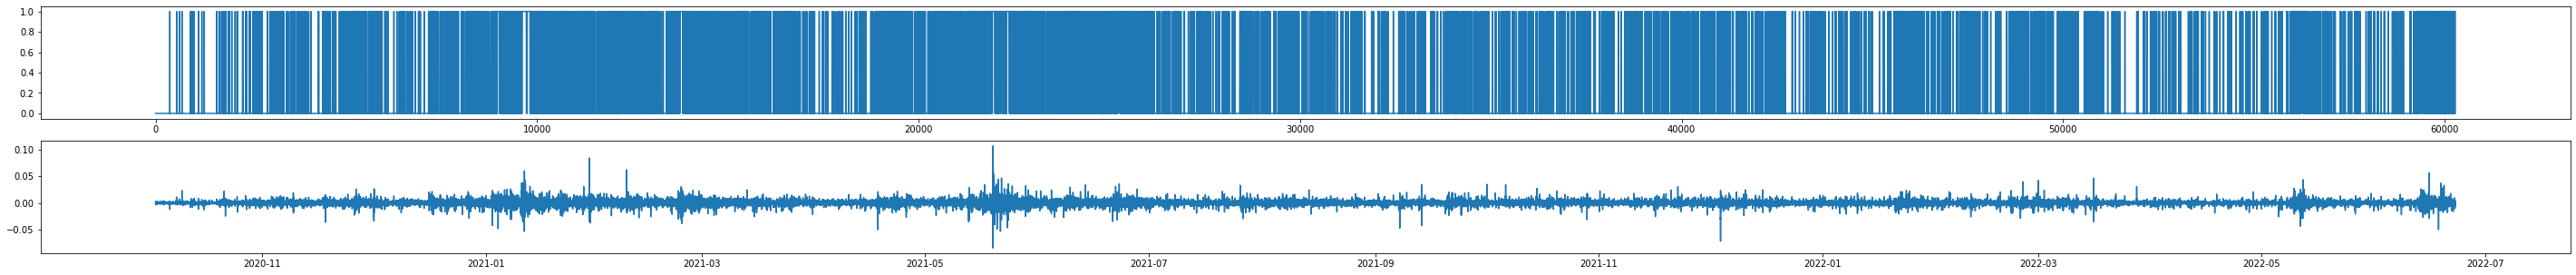

In [ ]:
fig, ax = plt.subplots(figsize=(50, 5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns);

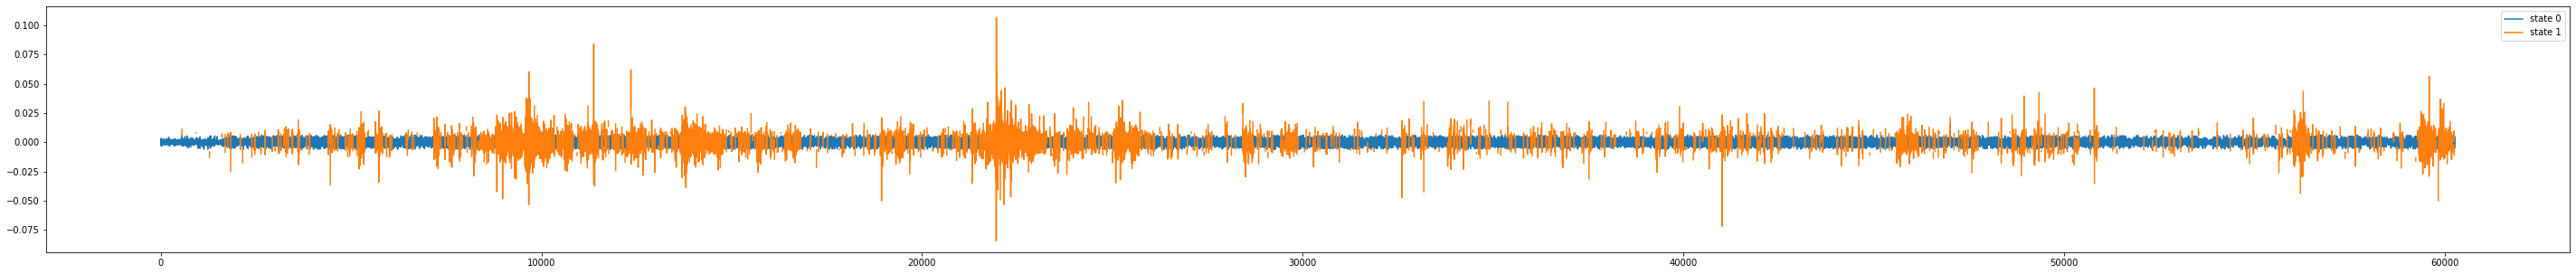

In [ ]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(50, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend();

#we can also create new time series samples from the model.

In [ ]:
# Generate samples
returns_samples, Z = model.sample(10000)


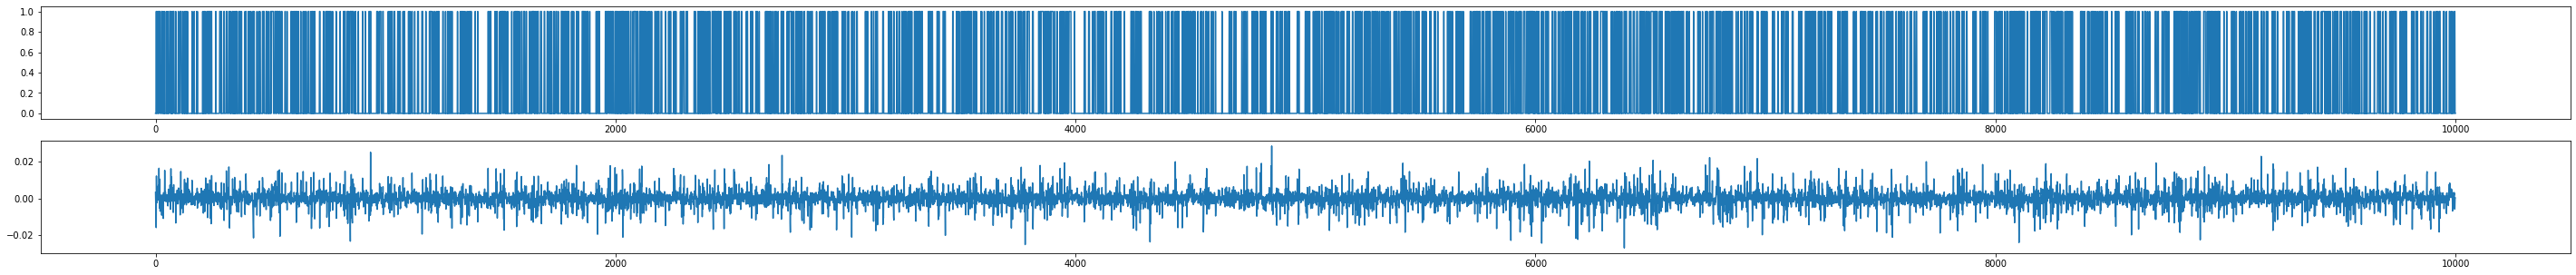

In [ ]:
fig, ax = plt.subplots(figsize=(50, 5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns_samples);

We can change the state transition probablities to make it more stringent

In [ ]:
# transition matrix
model.transmat_

array([[0.82873032, 0.17126968],
       [0.46666372, 0.53333628]])

In [ ]:
# try to set the transition matrix intuitively
model.transmat_ = np.array([
  [0.999, 0.001],
  [0.001, 0.999],                           
])

In [ ]:
# run inference again
Z = model.predict(X)

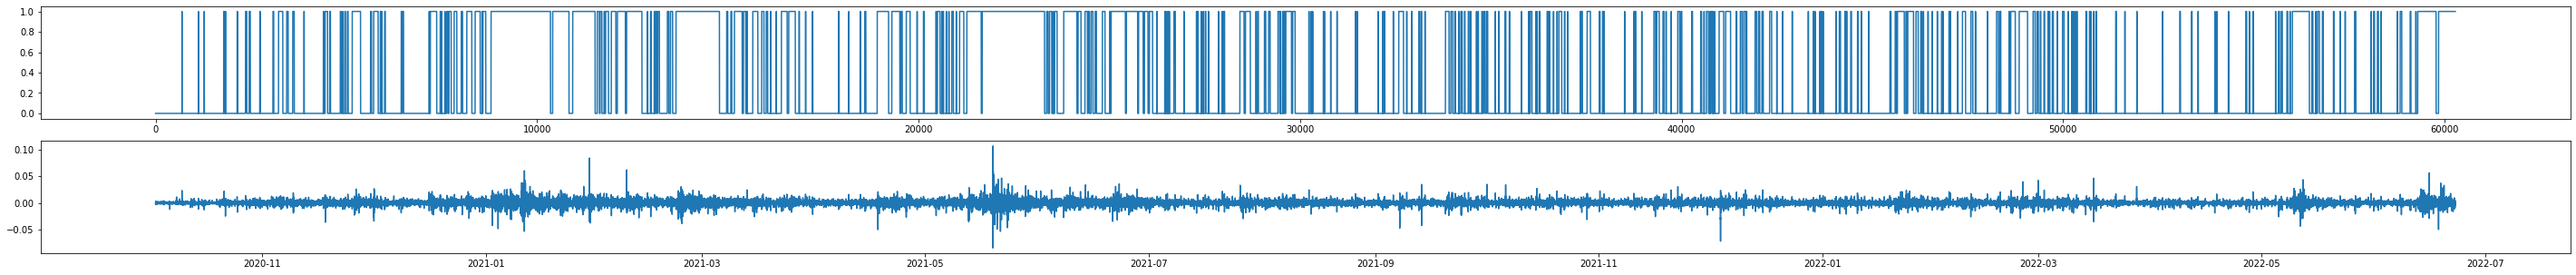

In [ ]:
fig, ax = plt.subplots(figsize=(50, 5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns);

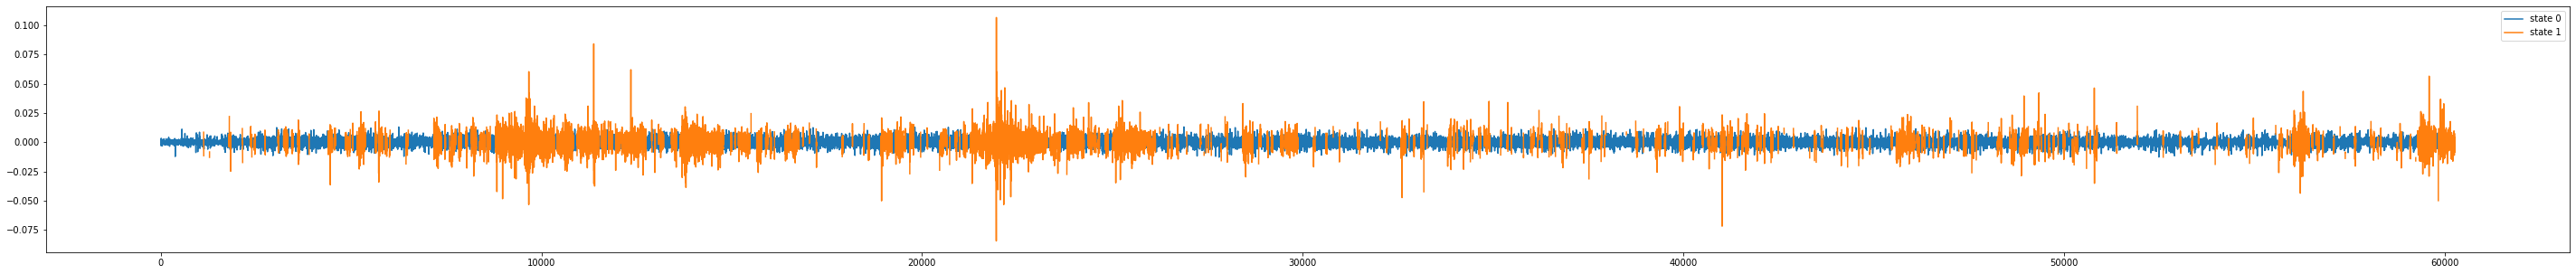

In [ ]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(50, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend();